---
Some useful $\LaTeX$ commands are defined in this cell:
$$
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\set}[1]{\left\{#1\right\}}
\newcommand{\paren}[1]{\left(#1\right)}
\newcommand{\brack}[1]{\left[#1\right]}
\newcommand{\ip}[2]{\left\langle#1,#2\right\rangle}
\DeclareMathOperator{\span}{span}
\DeclareMathOperator{\fl}{fl}
\abs{x}, \norm{x}, \set{x}, \paren{x}, \brack{x}, \ip{x}{y}, \span, \fl
$$

---

---
# 16.4 Multistep methods
---

We will now look at methods that compute the next point $y_{i+1}$ using information from **$s$ previous points**

$$ (t_{i-s+1}, y_{i-s+1}), \quad \ldots, \quad (t_{i-1}, y_{i-1}), \quad (t_{i}, y_{i}). $$

In this section, we define

$$f_i = f(t_i, y_i), \quad i = 0, 1, \ldots.$$

We will **interpolate** the $s$ points 

$$ (t_{i-s+1}, f_{i-s+1}), \quad \ldots, \quad (t_{i-1}, f_{i-1}), \quad (t_{i}, f_{i}), $$

with a **polynomial**, and use this polynomial approximate the integral in the formula

$$y(t_{i+1}) = y(t_i) + \int_{t_i}^{t_{i+1}} f(t,y(t))\,dt.$$

---

## The two-step Adams-Bashforth method

If we interpolate the last two points $(t_{i-1},f_{i-1})$ and $(t_{i},f_{i})$ with a straight line, we obtain the interpolating polynomial (in Newton form)

$$p_1(t) = f[t_{i-1}] + f[t_{i-1},t_i](t - t_{i-1});$$

that is,

$$p_1(t) = f_{i-1} + \frac{f_i - f_{i-1}}{t_i - t_{i-1}}(t - t_{i-1}).$$

Simplifying, we have

$$
p_1(t) = f_{i-1} + \frac{f_i - f_{i-1}}{h}(t - t_{i-1}).
$$

Then,

$$
\begin{split}
\int_{t_i}^{t_{i+1}} p_1(t)\,dt 
&= \left[f_{i-1}t + \frac{f_i - f_{i-1}}{2h}(t - t_{i-1})^2\right]_{t_i}^{t_{i+1}} \\
&= \paren{f_{i-1}t_{i+1} + \frac{f_i - f_{i-1}}{2h}(t_{i+1} - t_{i-1})^2} - \paren{f_{i-1}t_i + \frac{f_i - f_{i-1}}{2h}(t_i - t_{i-1})^2} \\
&= f_{i-1}(t_{i+1} - t_i) + \frac{f_i - f_{i-1}}{2h}(2h)^2 - \frac{f_i - f_{i-1}}{2h} h^2 \\
&= f_{i-1}h + 2h(f_i - f_{i-1}) - \frac{h}{2}(f_i - f_{i-1}) \\
&= h \paren{f_{i-1} + 2f_i - 2f_{i-1} - \frac{1}{2}f_i + \frac{1}{2}f_{i-1}} \\
&= h \paren{\frac{3}{2}f_i - \frac{1}{2}f_{i-1}}. \\
\end{split}
$$

Therefore, we obtain the **two-step Adams-Bashforth method**:

$$y_0 = c_0, \quad y_1 = c_1, \quad y_{i+1} = y_i + \frac{h}{2} \paren{3f_i - f_{i-1}}, \quad i = 1, 2, \ldots, N-1.$$

---

## An implementation of the two-step Adams-Bashforth method

In [12]:
function ab2step(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    ff = zeros(N+1)

    yy[1] = y0
    ff[1] = f(tt[1], yy[1])
        
    # Define yy[2] using the RK trapezoidal method
    K1 = ff[1]
    K2 = f(tt[2], yy[1] + h*K1)
    yy[2] = yy[1] + h/2*(K1 + K2)

    for i = 2:N
        ff[i] = f(tt[i], yy[i])
        yy[i+1] = yy[i] + h/2*(3ff[i] - ff[i-1])
    end
    
    tt, yy
    
end

ab2step (generic function with 1 method)

In [13]:
function euler(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    yy[1] = y0

    for i = 1:N
        K1 = f(tt[i], yy[i])
        yy[i+1] = yy[i] + h*K1
    end
    
    tt, yy
    
end

euler (generic function with 1 method)

In [14]:
#####################################################
# Define the ODE and the true solution
f(t, y) = -5y + 5t^2 + 2t
a, b, y0 = 0, 1, 1
ytrue(t) = t.^2 + exp(-5t)

ytrue (generic function with 1 method)

In [17]:
using Printf

@printf("%6s %8s %12s %12s\n", 
    "N", "h", "euler", "ab2step")
for k = 0:4
    N = 10^k
    h = (b - a)/N

    tt1, yy1 = euler(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue.(tt1))
    
    tt2, yy2 = ab2step(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue.(tt2))
    
    @printf("%6d %8.0e %12.2e %12.2e\n", 
        N, h, maximum(abserr1), maximum(abserr2) )
end

     N        h        euler      ab2step
     1    1e+00     5.01e+00     1.10e+01
    10    1e-01     1.33e-01     3.90e-02
   100    1e-02     1.07e-02     3.84e-04
  1000    1e-03     1.05e-03     3.83e-06
 10000    1e-04     1.05e-04     3.83e-08


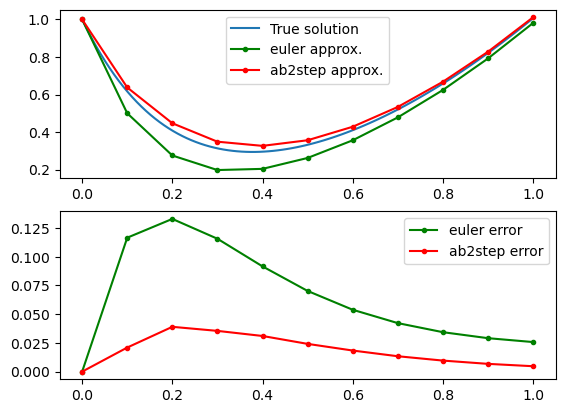

In [22]:
using PyPlot

N = 10

tt = range(a, b, length=100)

tt1, yy1 = euler(f, a, b, y0, N)
tt2, yy2 = ab2step(f, a, b, y0, N)
abserr1 = abs.(yy1 - ytrue.(tt1))
abserr2 = abs.(yy2 - ytrue.(tt2))

subplot(2, 1, 1)
plot(tt, ytrue.(tt), label="True solution")
plot(tt1, yy1, ".-g", label="euler approx.")
plot(tt2, yy2, ".-r", label="ab2step approx.")
legend(loc="best")

subplot(2, 1, 2)
plot(tt1, abserr1, ".-g", label="euler error")
plot(tt2, abserr2, ".-r", label="ab2step error")
legend(loc="best");

---

## Higher order Adams-Bashforth methods

We can similarly obtain the **three-** and **four-step Adams-Bashforth methods**:

$$y_{i+1} = y_i + \frac{h}{12} \paren{23f_i - 16f_{i-1} + 5f_{i-2}}$$

$$y_{i+1} = y_i + \frac{h}{24} \paren{55f_i - 59f_{i-1} + 37f_{i-2} - 9f_{i-3}}$$

In each case, a number of initial values $y_0, y_1, \ldots$, must be defined before the above formulas can be used.

The **one-step Adams-Bashforth method** is simply Euler's method.

In [23]:
function ab3step(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    ff = zeros(N+1)

    yy[1] = y0
        
    # Define yy[2:3] using the RK4 method
    for i = 1:2
        ff[i] = f(tt[i], yy[i])
        K1 = ff[i]
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        K3 = f(tt[i] + h/2, yy[i] + h/2*K2)
        K4 = f(tt[i+1], yy[i] + h*K3)
        yy[i+1] = yy[i] + h/6*(K1 + 2K2 + 2K3 + K4)
    end
    
    for i = 3:N
        ff[i] = f(tt[i], yy[i])
        yy[i+1] = yy[i] + h/12*(23ff[i] - 16ff[i-1] + 5ff[i-2])
    end
    
    tt, yy
    
end

ab3step (generic function with 1 method)

In [24]:
function ab4step(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    ff = zeros(N+1)

    yy[1] = y0
        
    # Define yy[2:4] using the RK4 method
    for i = 1:3
        ff[i] = f(tt[i], yy[i])
        K1 = ff[i]
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        K3 = f(tt[i] + h/2, yy[i] + h/2*K2)
        K4 = f(tt[i+1], yy[i] + h*K3)
        yy[i+1] = yy[i] + h/6*(K1 + 2K2 + 2K3 + K4)
    end

    for i = 4:N
        ff[i] = f(tt[i], yy[i])
        yy[i+1] = yy[i] + h/24*(55ff[i] - 59ff[i-1] + 37ff[i-2] - 9ff[i-3])
    end
    
    tt, yy
    
end

ab4step (generic function with 1 method)

In [26]:
#####################################################
# Define the ODE and the true solution
f(t, y) = -5y + 5t^2 + 2t
a, b, y0 = 0, 1, 1
ytrue(t) = t^2 + exp(-5t)

ytrue (generic function with 1 method)

In [27]:
@printf("%6s %8s %12s %12s %12s %12s\n", 
    "N", "h", 
    "euler", "ab2step", 
    "ab3step", "ab4step")
for k = 1:4
    N = 10^k
    h = (b - a)/N

    tt1, yy1 = euler(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue.(tt1))

    tt2, yy2 = ab2step(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue.(tt2))

    tt3, yy3 = ab3step(f, a, b, y0, N)
    abserr3 = abs.(yy3 - ytrue.(tt3))
    
    tt4, yy4 = ab4step(f, a, b, y0, N)
    abserr4 = abs.(yy4 - ytrue.(tt4))
    
    @printf("%6d %8.0e %12.2e %12.2e %12.2e %12.2e\n",
        N, h, 
        maximum(abserr1), maximum(abserr2), 
        maximum(abserr3), maximum(abserr4) )
end

     N        h        euler      ab2step      ab3step      ab4step
    10    1e-01     1.33e-01     3.90e-02     1.24e-02     1.27e-02
   100    1e-02     1.07e-02     3.84e-04     1.65e-05     7.49e-07
  1000    1e-03     1.05e-03     3.83e-06     1.72e-08     7.96e-11
 10000    1e-04     1.05e-04     3.83e-08     1.72e-11     7.83e-15


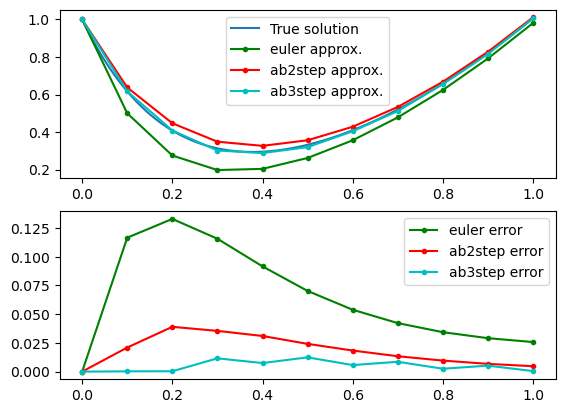

In [33]:
using PyPlot

N = 10

tt = range(a, b, length=100)

tt1, yy1 = euler(f, a, b, y0, N)
tt2, yy2 = ab2step(f, a, b, y0, N)
tt3, yy3 = ab3step(f, a, b, y0, N)
abserr1 = abs.(yy1 - ytrue.(tt1))
abserr2 = abs.(yy2 - ytrue.(tt2))
abserr3 = abs.(yy3 - ytrue.(tt3))

subplot(2, 1, 1)
plot(tt, ytrue.(tt), label="True solution")
plot(tt1, yy1, ".-g", label="euler approx.")
plot(tt2, yy2, ".-r", label="ab2step approx.")
plot(tt3, yy3, ".-c", label="ab3step approx.")
legend(loc="best")

subplot(2, 1, 2)
plot(tt1, abserr1, ".-g", label="euler error")
plot(tt2, abserr2, ".-r", label="ab2step error")
plot(tt3, abserr3, ".-c", label="ab3step error")
legend(loc="best");

---

## The implicit Adams-Moulton methods

Interpolating the three points $(t_{i-1},f_{i-1})$, $(t_{i},f_{i})$, and $(t_{i+1},f_{i+1})$ with a quadratic polynomial, $p_2(t)$, we will find that

$$ \int_{t_i}^{t_{i+1}} p_2(t)\,dt = h \paren{\frac{5}{12} f_{i+1} + \frac{2}{3} f_i - \frac{1}{12} f_{i-1}}.$$

Therefore, we obtain the following **implicit** method

$$ y_{i+1} = y_i + \frac{h}{12}(5 f_{i+1} + 8 f_i - f_{i-1})$$

known as the **two-step Adams-Moulton method**.

We can similarly obtain the implicit **three-step Adams-Moulton method**:

$$y_{i+1} = y_i + \frac{h}{24} \paren{9f_{i+1} + 19f_{i} - 5f_{i-1} + f_{i-2}}.$$

---

## Exercise

Implement the implicit **two-step Adams-Moulton method**

$$ y_{i+1} = y_i + \frac{h}{12}(5 f_{i+1} + 8 f_i - f_{i-1})$$

for the ODE

$$\frac{dy}{dt} = -5y + 5t^2 + 2t, \quad 0 \leq t \leq 1, \quad y(0) = 1,$$

which has an exact solution of

$$y(t) = t^2 + e^{-5t}.$$



In [34]:
#####################################################
# Define the ODE and the true solution
f(t, y) = -5y + 5t^2 + 2t
a, b, y0 = 0, 1, 1
ytrue(t) = t^2 + exp(-5t)

ytrue (generic function with 1 method)

In [36]:
@printf("%6s %8s %12s\n", 
    "N", "h", "am2step")
for k = 1:4
    N = 10^k
    h = (b - a)/N
    
    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    ff = zeros(N+1)
    
    yy[1] = y0
    ff[1] = f(tt[1], yy[1])
    
    # Define yy[2] using the RK4 method
    K1 = ff[1]
    K2 = f(tt[1] + h/2, yy[1] + h/2*K1)
    K3 = f(tt[1] + h/2, yy[1] + h/2*K2)
    K4 = f(tt[2], yy[1] + h*K3)
    yy[2] = yy[1] + h/6*(K1 + 2K2 + 2K3 + K4)
    ff[2] = f(tt[2], yy[2])

    for i = 2:N
        yy[i+1] = ( yy[i] + 
        h/12*(25tt[i+1]^2 + 10tt[i+1] + 8ff[i] - ff[i-1]) )/(25h/12 + 1)
        ff[i+1] = f(tt[i+1], yy[i+1])
    end
    
    abserr = abs.(yy - ytrue.(tt))
    
    @printf("%6d %8.0e %12.2e\n",
        N, h, maximum(abserr))
end

     N        h      am2step
    10    1e-01     1.53e-03
   100    1e-02     1.86e-06
  1000    1e-03     1.91e-09
 10000    1e-04     1.89e-12


---

## General linear multistep method

In general, we define $y_{i+1}$ using $s$ previous steps as

$$\sum_{j=0}^s a_j y_{i+1-j} = h \sum_{j=0}^s b_j f_{i+1-j}.$$

The above methods used

$$a_0 = 1, \quad a_1 = -1, \quad a_2 = \cdots = a_s = 0.$$

The method is **explicit** if $b_0 = 0$; otherwise, if $b_0 \neq 0$, then the method is **implicit**.


The **local truncation error** is given by

$$d_i = \frac{1}{h} \paren{\sum_{j=0}^s a_j y(t_{i+1-j}) } - \sum_{j=0}^s b_j y'(t_{i+1-j}).$$

---

> ## Theorem: (Multistep Method Order of Accuracy)
>
> Let 
>
>
>\begin{align}
C_0 &= \sum_{j=0}^s a_j, \\
C_i &= (-1)^i \brack{\frac{1}{i!} \sum_{j=1}^s j^i a_j + \frac{1}{(i-1)!} \sum_{j=0}^s j^{(i-1)} b_j}, & i &= 1, 2, \ldots. 
\end{align}
>
> Then the linear multistep method has order $p$ if and only if
>
> $$C_0 = C_1 = \cdots = C_p = 0, \quad C_{p+1} \neq 0.$$
>
> Furthermore, the local truncation error is then given by
>
> $$d_i = C_{p+1} h^p y^{(p+1)}(t_i) + \mathcal{O}(h^{p+1}).$$

---

## Order of the two-step Adams-Bashforth method

Recall

$$y_{i+1} = y_i + \frac{h}{2} \paren{3f_i - f_{i-1}}$$

We obtain this method from the general formula

$$\sum_{j=0}^s a_j y_{i+1-j} = h \sum_{j=0}^s b_j f_{i+1-j},$$

with $s = 2$ and

$$
\begin{align}
a_0 &= 1, & b_0 &= 0, \\
a_1 &= -1, & b_1 &= \frac32,\\
a_2 &= 0, & b_2 &= -\frac12.
\end{align}
$$

Therefore,

$$
\begin{align}
C_0 &= a_0 + a_1 + a_2 = 0, \\
C_1 &= -\brack{\frac11\paren{1^1a_1} + \frac11\paren{1^0b_1 + 2^0b_2}} 
= -\brack{\frac11(-1) + \frac11\paren{\frac32 - \frac12}} = 0, \\
C_2 &= \brack{\frac12\paren{1^2a_1} + \frac11\paren{1^1b_1 + 2^1b_2}} 
= \brack{\frac12(-1) + \frac11\paren{\frac32 - 2\frac12}} = 0, \\
C_3 &= -\brack{\frac16\paren{1^3a_1} + \frac12\paren{1^2b_1 + 2^2b_2}} 
= -\brack{\frac16(-1) + \frac12\paren{\frac32 - 4\frac12}} = \frac{5}{12}.\\
\end{align}
$$

Thus, the order of accuracy of the two-step Adams-Bashforth method is $\mathcal{O}(h^2)$ and

$$d_i = \frac{5}{12} h^2 y'''(t_i) + \mathcal{O}(h^3).$$

---

## Order of the two-step Adams-Moulton method

Recall

$$ y_{i+1} = y_i + \frac{h}{12}(5 f_{i+1} + 8 f_i - f_{i-1})$$


We obtain this method from the general formula

$$\sum_{j=0}^s a_j y_{i+1-j} = h \sum_{j=0}^s b_j f_{i+1-j},$$

with $s = 2$ and

$$
\begin{align}
a_0 &= 1, & b_0 &= \frac{5}{12}, \\
a_1 &= -1, & b_1 &= \frac{2}{3},\\
a_2 &= 0, & b_2 &= -\frac{1}{12}.
\end{align}
$$

Therefore,

$$
\begin{align}
C_0 &= a_0 + a_1 + a_2 = 0, \\
C_1 &= -\brack{\frac11\paren{1^1a_1} + \frac11\paren{0^0b_0 + 1^0b_1 + 2^0b_2}} 
= -\brack{\frac11(-1) + \frac11\paren{\frac{5}{12} + \frac23 - \frac{1}{12}}} = 0, \\
C_2 &= \brack{\frac12\paren{1^2a_1} + \frac11\paren{0^1b_0 + 1^1b_1 + 2^1b_2}} 
= \brack{\frac12(-1) + \frac11\paren{0\frac{5}{12} + 1\frac23 - 2\frac{1}{12}}} = 0, \\
C_3 &= -\brack{\frac16\paren{1^3a_1} + \frac12\paren{0^2b_0 + 1^2b_1 + 2^2b_2}} 
= -\brack{\frac16(-1) + \frac12\paren{0\frac{5}{12} + 1\frac23 - 4\frac{1}{12}}} = 0, \\
C_4 &= \brack{\frac{1}{24}\paren{1^4a_1} + \frac16\paren{0^3b_0 + 1^3b_1 + 2^3b_2}} 
= \brack{\frac{1}{24}(-1) + \frac16\paren{0\frac{5}{12} + 1\frac23 - 8\frac{1}{12}}} = -\frac{1}{24}, \\
\end{align}
$$

Thus, the order of accuracy of the two-step Adams-Moulton method is $\mathcal{O}(h^3)$ and

$$d_i = -\frac{1}{24} h^3 y^{(4)}(t_i) + \mathcal{O}(h^4).$$

---

## Backward differentiation formulas (BDF)

Now we consider interpolating the $s$ points 

$$ (t_{i-s+1}, y_{i-s+1}), \quad \ldots, \quad (t_{i}, y_{i}), \quad (t_{i+1}, y_{i+1}), $$

with a polynomial, and use this polynomial approximate the derivative in the formula

$$y'(t_{i+1}) = f(t_{i+1}, y(t_{i+1})).$$

---

## The two-step BDF method

If we interpolate the points $(t_{i-1},y_{i-1})$, $(t_{i},y_{i})$, and $(t_{i+1},y_{i+1})$ with a quadratic, we obtain the interpolating polynomial 

$$p_2(t) = y[t_{i-1}] + y[t_{i-1},t_i](t - t_{i-1}) + y[t_{i-1},t_i,t_{i+1}](t - t_{i-1})(t - t_i);$$

that is,

$$p_2(t) = y_{i-1} + \frac{y_i - y_{i-1}}{h}(t - t_{i-1}) + \frac{y_{i-1} - 2y_i + y_{i+1}}{2h^2}(t - t_{i-1})(t - t_i).$$

Therefore,

$$p_2'(t) = \frac{y_i - y_{i-1}}{h} + \frac{y_{i-1} - 2y_i + y_{i+1}}{2h^2}(2t - t_{i-1} - t_i),$$

and so

$$
\begin{align}
p_2'(t_{i+1}) 
&= \frac{y_i - y_{i-1}}{h} + \frac{y_{i-1} - 2y_i + y_{i+1}}{2h^2}(2t_{i+1} - t_{i-1} - t_i)\\
&= \frac{y_i - y_{i-1}}{h} + \frac{y_{i-1} - 2y_i + y_{i+1}}{2h^2}(3h)\\
&= \frac{1}{h}\paren{y_i - y_{i-1} + \frac{3}{2}(y_{i-1} - 2y_i + y_{i+1})}\\
&= \frac{1}{h}\paren{\frac12y_{i-1} -2y_i + \frac{3}{2}y_{i+1}}\\
\end{align}
$$

Now we replace $y'(t_{i+1})$ with $p_2'(t_{i+1})$ in the formula

$$y'(t_{i+1}) = f(t_{i+1}, y(t_{i+1}))$$

to obtain

$$\frac{1}{h}\paren{\frac12y_{i-1} -2y_i + \frac{3}{2}y_{i+1}} = f_{i+1}.$$

Rearranging, we obtain the implicit **two-step BDF**

$$y_{i+1}  - \frac43y_i + \frac13y_{i-1} = \frac23hf_{i+1},$$

which can be shown to have order of accuracy $\mathcal{O}(h^2)$.


---

## Higher order BDFs

- Three-step $\mathcal{O}(h^3)$ BDF:

    $$y_{i+1} - \frac{18}{11}y_i + \frac{9}{11}y_{i-1} - \frac{2}{11}y_{i-2} = \frac{6}{11}hf_{i+1}$$
    
    which is obtained by interpolating $(t_{i-2},y_{i-2})$, $(t_{i-1},y_{i-1})$, $(t_{i},y_{i})$, $(t_{i+1},y_{i+1})$.
    
- Four-step $\mathcal{O}(h^4)$ BDF:

    $$y_{i+1} - \frac{48}{25}y_i + \frac{36}{25}y_{i-1} - \frac{16}{25}y_{i-2} + \frac{3}{25}y_{i-3} = \frac{12}{25}hf_{i+1}$$

    which is obtained by interpolating $(t_{i-3},y_{i-3})$, $(t_{i-2},y_{i-2})$, $(t_{i-1},y_{i-1})$, $(t_{i},y_{i})$, $(t_{i+1},y_{i+1})$.


---

## Predictor-corrector methods

The implicit formulas we have seen have very nice properties, but are difficult to use. Here we will see an easy way to use these implicit formulas.

Consider, for example the **three-step Adams-Moulton method**:

$$y_{i+1} = y_i + \frac{h}{24} \paren{9f(t_{i+1},y_{i+1}) + 19f_{i} - 5f_{i-1} + f_{i-2}}.$$

Instead of solving this equation for $y_{i+1}$, we can use this formula as a **fixed-point iteration** starting from a good estimation for $y(t_{i+1})$.

## The PECE method

We can easily compute such a **predicted** value $y^p_{i+1}$ using the corresponding **four-step Adams-Bashforth method**:

$$y^p_{i+1} = y_i + \frac{h}{24} \paren{55f_i - 59f_{i-1} + 37f_{i-2} - 9f_{i-3}}.$$

Then we **evaluate**

$$f^p_{i+1} = f(t_{i+1},y^p_{i+1})$$

and compute a **corrected** value using _one fixed-point iteration_,

$$y_{i+1} = y_i + \frac{h}{24} \paren{9f^p_{i+1} + 19f_{i} - 5f_{i-1} + f_{i-2}},$$

and finally **evaluate**

$$f_{i+1} = f(t_{i+1},y_{i+1}).$$

This gives us the **Adams PECE (Predict-Evaluate-Correct-Evaluate) method**.

---

## An implementation of the fourth-order PECE method

In [38]:
function pece4(f, a, b, y0, N)
    
    h = (b - a)/N

    tt = range(a, b, length=N+1)
    yy = zeros(N+1)
    ff = zeros(N+1)

    yy[1] = y0
    ff[1] = f(tt[1], yy[1])

        
    # Define yy[2:4] using the RK4 method
    for i = 1:3
        K1 = ff[i]
        K2 = f(tt[i] + h/2, yy[i] + h/2*K1)
        K3 = f(tt[i] + h/2, yy[i] + h/2*K2)
        K4 = f(tt[i+1], yy[i] + h*K3)
        yy[i+1] = yy[i] + h/6*(K1 + 2K2 + 2K3 + K4)
        ff[i+1] = f(tt[i+1], yy[i+1])
    end

    for i = 4:N
        # Predict using four-step Adams-Bashforth
        yp = yy[i] + h/24*(55ff[i] - 59ff[i-1] + 37ff[i-2] - 9ff[i-3])
        
        # Evaluate
        fp = f(tt[i+1], yp)
        
        # Correct using three-step Adams-Moulton
        yy[i+1] = yy[i] + h/24*(9fp + 19ff[i] - 5ff[i-1] + ff[i-2])
        
        # Evaluate
        ff[i+1] = f(tt[i+1], yy[i+1])
    end
    
    tt, yy
    
end

pece4 (generic function with 1 method)

In [39]:
#####################################################
# Define the ODE and the true solution
f(t, y) = -5y + 5t^2 + 2t
a, b, y0 = 0, 1, 1
ytrue(t) = t^2 + exp(-5t)

ytrue (generic function with 1 method)

In [40]:
@printf("%6s %8s %12s %12s\n", 
    "N", "h", "ab4step", "pece4")
for k = 1:4
    N = 10^k
    h = (b - a)/N

    tt1, yy1 = ab4step(f, a, b, y0, N)
    abserr1 = abs.(yy1 - ytrue.(tt1))

    tt2, yy2 = pece4(f, a, b, y0, N)
    abserr2 = abs.(yy2 - ytrue.(tt2))
    
    @printf("%6d %8.0e %12.2e %12.2e\n",
        N, h, maximum(abserr1), maximum(abserr2))
end

     N        h      ab4step        pece4
    10    1e-01     1.27e-02     1.15e-03
   100    1e-02     7.49e-07     6.68e-08
  1000    1e-03     7.96e-11     6.13e-12
 10000    1e-04     7.83e-15     1.44e-15


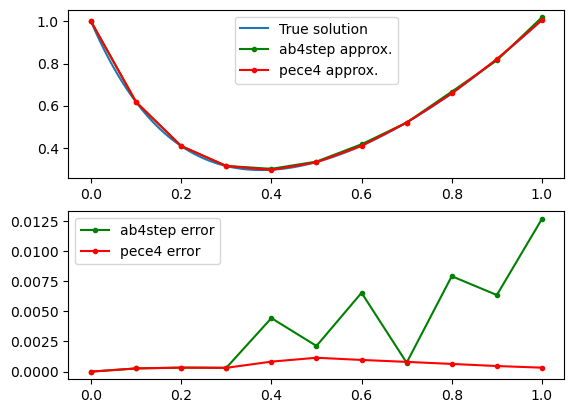

In [41]:
using PyPlot

N = 10

tt = range(a, b, length=100)

tt1, yy1 = ab4step(f, a, b, y0, N)
tt2, yy2 = pece4(f, a, b, y0, N)
abserr1 = abs.(yy1 - ytrue.(tt1))
abserr2 = abs.(yy2 - ytrue.(tt2))

subplot(2, 1, 1)
plot(tt, ytrue.(tt), label="True solution")
plot(tt1, yy1, ".-g", label="ab4step approx.")
plot(tt2, yy2, ".-r", label="pece4 approx.")
legend(loc="best")

subplot(2, 1, 2)
plot(tt1, abserr1, ".-g", label="ab4step error")
plot(tt2, abserr2, ".-r", label="pece4 error")
legend(loc="best");

---